# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
df=pd.read_excel("Scores.xlsx")

In [3]:
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


From this We can Conclude that, the highest number of Hour that any student has Studied is 9.2hr
while the highest Score got by any student is 95% .

The lowest number of Hour that any student has Studied is 1.10hr 
while the lowest Score got by any student is 17% .

The mean hour that the Student has studied is 5.01 
while the mean Score that got was 51.48

# Find Correlation

In [6]:
df.Scores.corr(df.Hours)

0.9761906560220887

<AxesSubplot:>

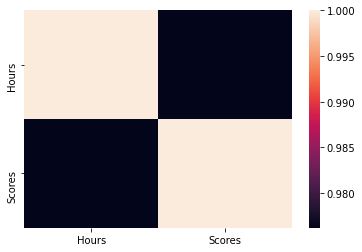

In [7]:
sns.heatmap(df.corr()) 

df has strong positive linear Coorelation between Scores and Hours so we plot them by using scatterplot to show this Clearly.

Text(0.5, 1.0, 'Hours vs Scores')

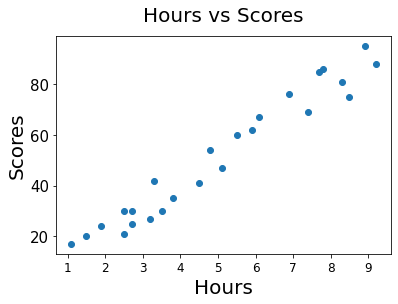

In [8]:
plt.scatter(x="Hours",y="Scores",data=df)
plt.xlabel('Date',fontsize = 25)
plt.xlabel("Hours",fontsize=20);
plt.tick_params(axis='x', which='major', labelsize=12)
plt.ylabel("Scores",fontsize=20);
plt.tick_params(axis='y', which='major', labelsize=15)
plt.title("Hours vs Scores",fontsize=20,pad=15)

# Prediction Of Score
# Importing Scikit Learn Library

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

Preparing the Dataset

In [10]:
X=df[['Hours']]

In [11]:
y=df[['Scores']]

Creating Trainig Model

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
model.coef_,model.intercept_

(array([[9.91065648]]), array([2.01816004]))

# DO Line in Scater plot

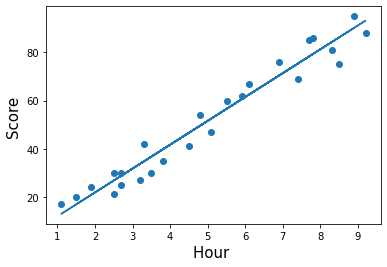

In [15]:
line = model.coef_*X+model.intercept_
plt.xlabel("Hour ",fontsize=15)
plt.ylabel("Score ",fontsize=15)
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Prediction

In [16]:
predictions=model.predict(X_test)
predictions

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

# Comparing the predictions Model with the actual Model

In [17]:
(y_test,predictions)

(    Scores
 5       20
 2       27
 19      69
 16      30
 11      62,
 array([[16.88414476],
        [33.73226078],
        [75.357018  ],
        [26.79480124],
        [60.49103328]]))

# What will be predicted score if a student studies for 9.25 hrs/ day?

In [18]:
pred_result=model.predict(np.array([[9.25]]))
pred_result

array([[93.69173249]])

If any student has studied for 9.25hr then he can Score 92.90%

# Mean Absolute Error

In [19]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, predictions)) 

Mean Absolute Error: 4.183859899002975
